# 機器學習 AI介紹
## 1.AI 概念
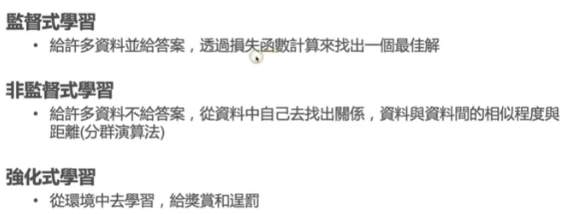
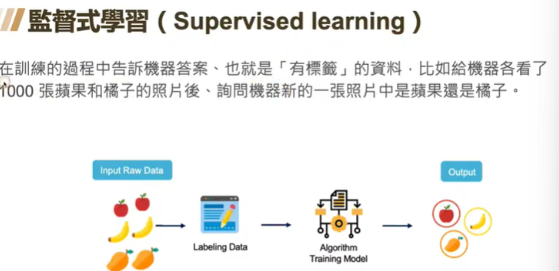
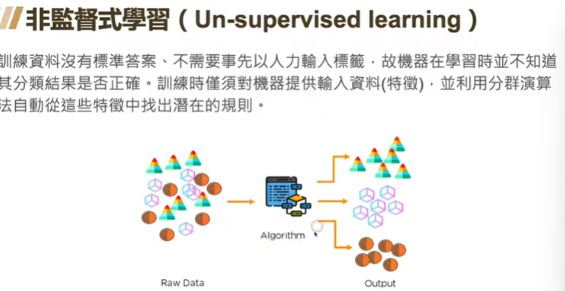
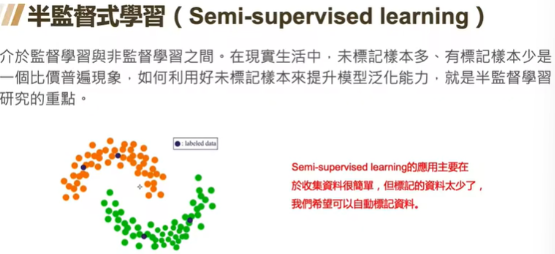
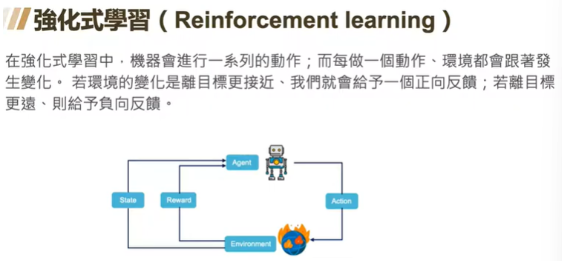
## 2.機器學習是一種學習的演算法，是一種從一大群資料中去學習找出解決問題的方法
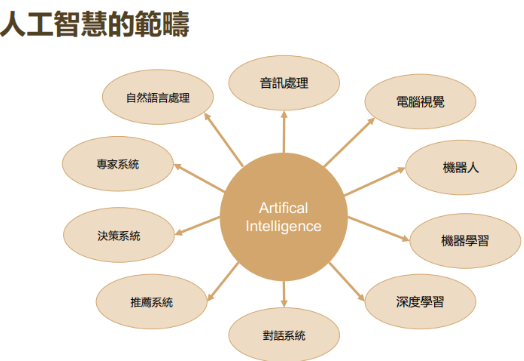
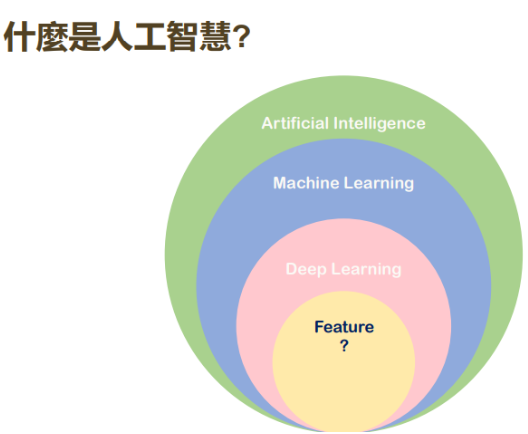
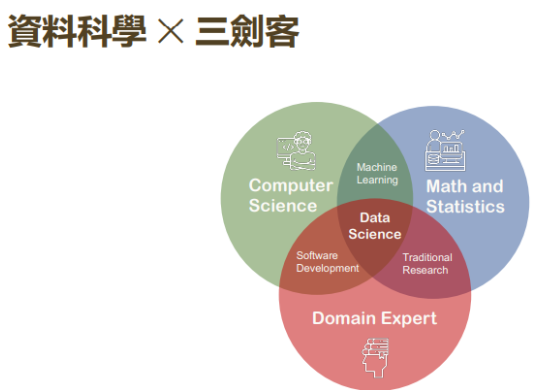
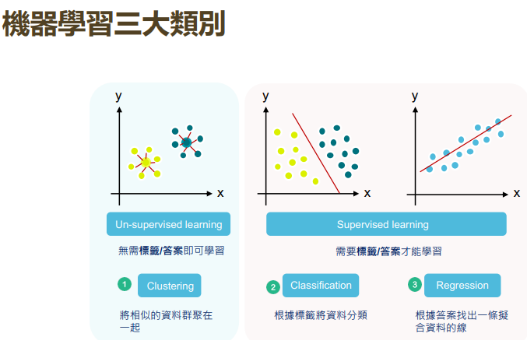
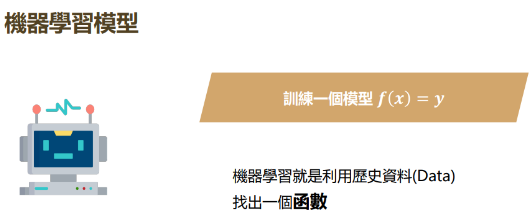
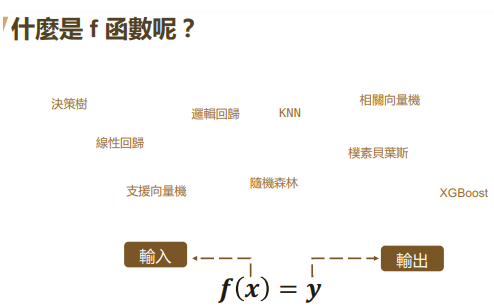
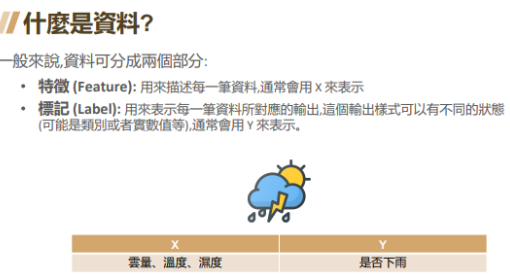
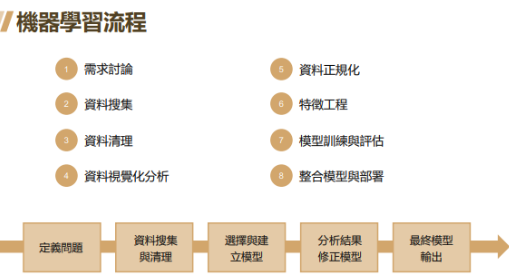
## 3.EDA(Exploratory) 探索式資料分析 : 
##### 透過數據統計方式視覺化資料，以利後續模型分析
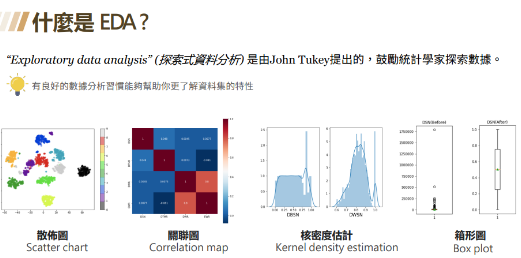
1. EDA 必要套件<br>
<b>• 資料處理 – Pandas, Numpy</b><br>
Pandas：Python 表格資料處理的重要工具<br>
Numpy：針對多維陣列的平行運算進行優化的強大函式庫<br>
<b>• 繪圖相關 – Matplotlib, Seaborn</b><br>
Matplotlib：Python 內最常被使用到的繪圖套件<br>
Seaborn：以matplotlib為底層的高階繪圖套件<br>

#### Example [程式實作] EDA : iris.cdv
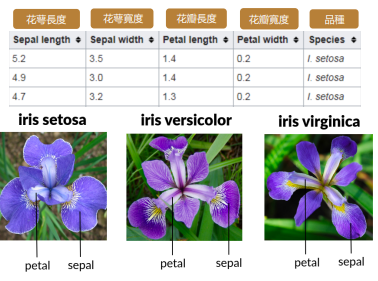

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

# 1. 載入 Iris資料集
url ='https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train= pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train =df_train.drop(labels=["Id"],axis=1)
display(df_train)
print(df_train.shape)

# 2. 手動編碼
label_map ={'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}
df_train['Class'] =df_train['Species'].map(label_map)
display(df_train.sample(10))

# (1) 直方圖  histograms
print('直方圖==================================================')
df_train.hist(alpha=0.6, figsize=(12,12))
plt.tight_layout() # 自動調整 histogram 不會擠在一起
plt.show()

# (2) 核密度估計圖 Kernal Density Estimation(KDE)
print('核密度估計圖 ==================================================')
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize =(10,10),color = 'b',diagonal ='kde')

sns.pairplot(df_train, hue = 'Species',size = 2,diag_kind = 'kde')

# (3) 關聯分析 (correlation calculate) 
# correlatoion map

print('correlatoion map ==================================================')
corr = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square = True, annot =True, cmap='RdBu_r')  # center=0, cmap='YlGnBu'

#(4) 散佈 圖
sns.lmplot('SepalLengthCm','SepalWidthCm', hue ='Species', data=df_train, fit_reg=False)

sns.lmplot('PetalLengthCm','PetalWidthCm', hue ='Species', data=df_train, fit_reg=False)

### (4) 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Class')

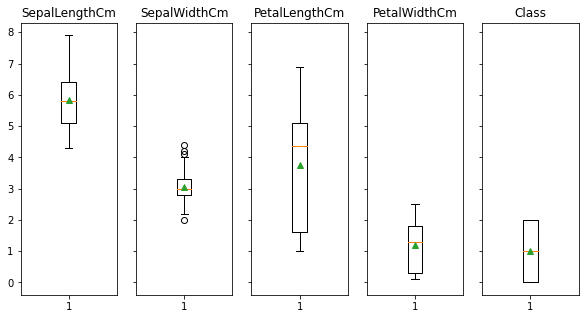

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_train['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Class'],showmeans=True)
axes[4].set_title('Class')

### (5) 分布狀態圖

C:\Users\mikal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mikal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mikal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

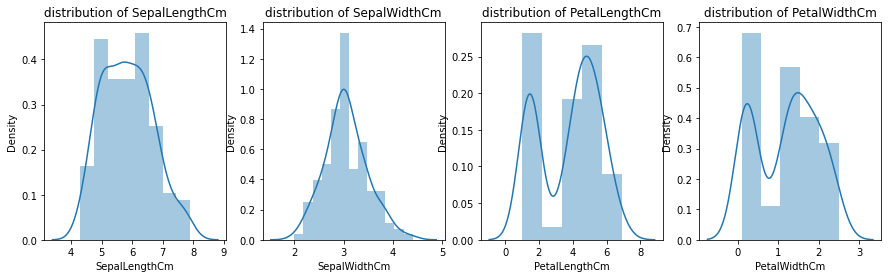

In [3]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(df_train["SepalLengthCm"][:],ax=axes[0])
sns.distplot(df_train["SepalWidthCm"][:],ax=axes[1])
sns.distplot(df_train["PetalLengthCm"][:],ax=axes[2])
sns.distplot(df_train["PetalWidthCm"][:],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

### 21.免費雲端 Jupyter Notebook 資源
#### (1) 單機版電腦安裝
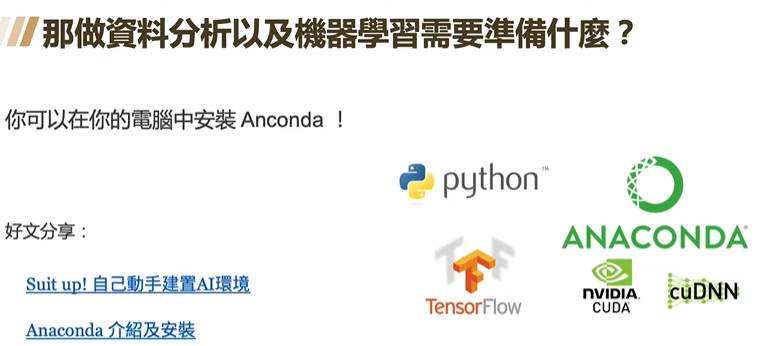
#### (2) 挖掘免費雲端 Jupyter Notebook 資源
Kaggle & Google Colaboratory
##### 1. Kaggle
Kaggle 是一個數據建模和數據分析競賽平台，你可以不定時在上面看到許多競賽，也可以看到許多公司將他們未解決的資料集公開分享
給各位讓大家一起來解決。除此之外 Kaggle 使用者也可以公開分享自己的 kernel 讓大家參考你的程式，幸運的話你可以在這裡挖到寶。
註冊成功後會看到此畫面(隨著時間可能頁面會稍微長得不一樣)，點選左邊欄 Notebooks 就可以看到自己的程式以及他人分享的程式。
點選右上角 New Notebook 即可建立一個新的專案，這裡你可以選擇 R 語言或 Python。
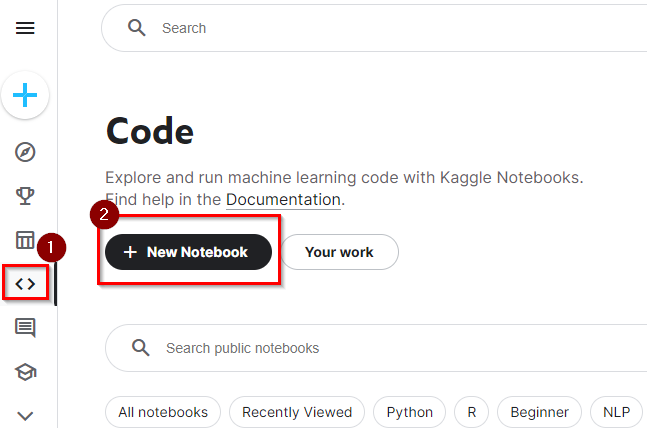

### 2. Google Colaboratory
我們都簡稱 Colab。這個平台是 Google 所維護的服務，他會與你的 Google Drive 連動，這也意味著你得程式碼將會備份在雲端硬碟中。基本上你只要打開雲端硬碟在安裝 Chrome 的相關套件就可以使用了～
這裡我也提供一個範例程式，各位可以跟著下面步驟並 Fork 到自己的雲端硬碟中。

若是初次使用的讀者，此時若沒看到 Google Colaboratory 的選項表示你的電腦尚未安裝插件。接著點選更多應用程式來下載。
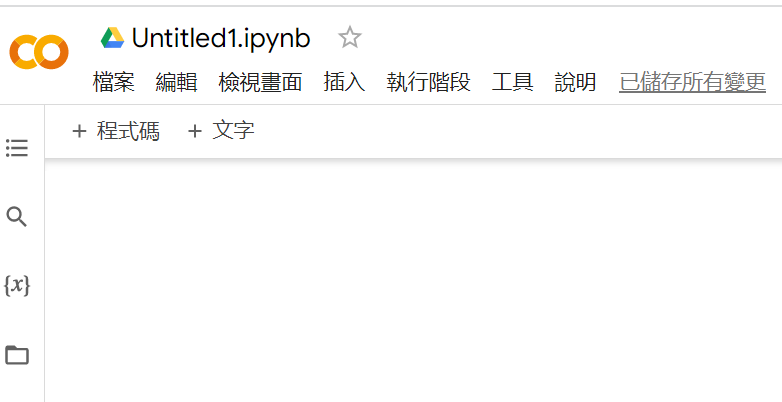

##### use GPU
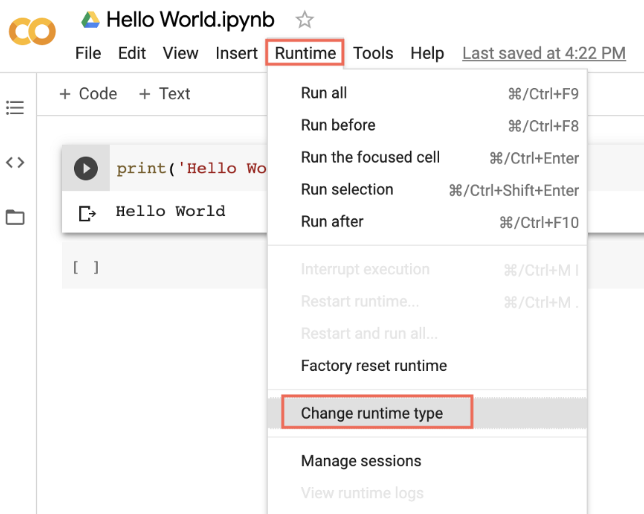
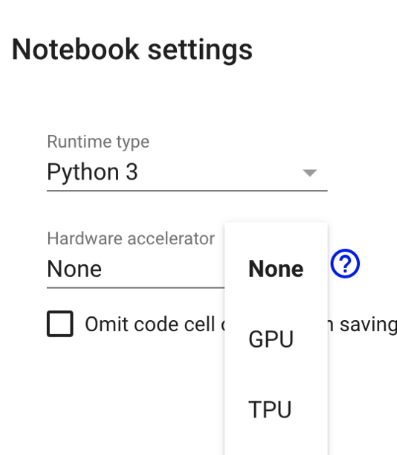

### 22.儲存訓練好的模型
#### 使用 pickle + gzip 儲存模型 :將訓練好的模型打包並儲存
#### 載入儲存的模型 :讀取打包好的模型，並預測
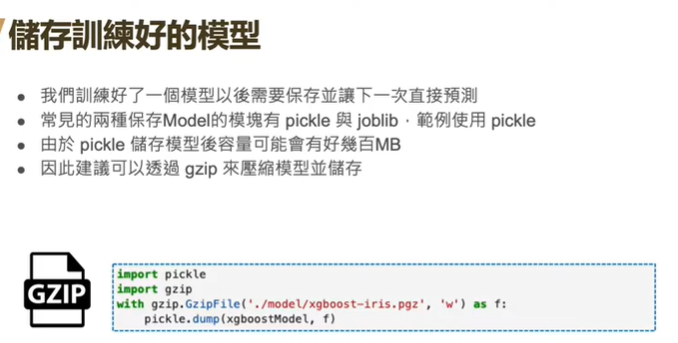
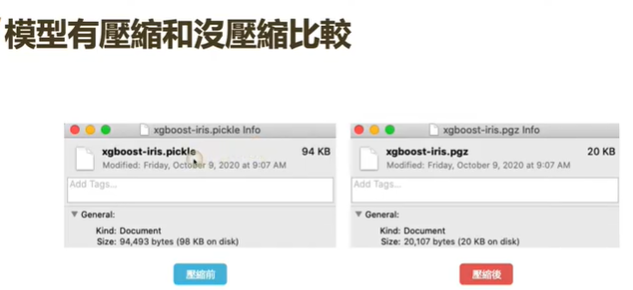
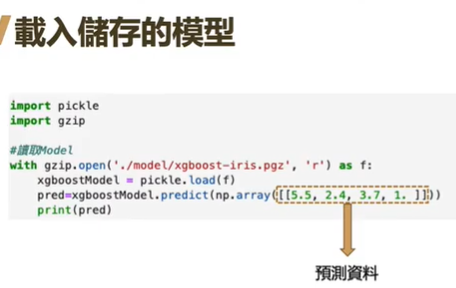

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

# 1) 載入資料集
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_data = df_data.drop(labels=['Id'],axis=1) # 移除Id
display(df_data)

# 2) 手動編碼
#處理名目資料 (Nominal variables) - 資料前處理 依據特徵資料的特性，可以選擇手動編碼或自動編碼。
# 使用編碼時機:進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)
display(df_data)

# 3) 檢查缺失值
# 使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。
# 使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下
# 建議可以透過機器學習的方法補值來預測缺失值。
# 移除缺失值
df_data=df_data.dropna()
X = df_data.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

# 4) 切割訓練集與測試集
from sklearn.model_selection import train_test_split
X=df_data.drop(labels=['Class','Species'],axis=1).values
y=df_data['Class'].values
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=42)
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


checked missing data(NAN mount): 0
Training data shape: (105, 4)
Testing data shape: (45, 4)


### XGBoost (classfication)
Boosting 則是希望能夠由後面生成的樹，來修正前面樹學的不好的地方。
#### Parameters:
* n_estimators: 總共迭代的次數，即決策樹的個數。預設值為100。
* max_depth: 樹的最大深度，默認值為6。
* booster: gbtree 樹模型(預設) / gbliner 線性模型
* learning_rate: 學習速率，預設0.3。
* gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。
#### Attributes:
* featureimportances: 查詢模型特徵的重要程度。
#### Methods:
* fit: 放入X、y進行模型擬合。
* predict: 預測並回傳預測類別。
* score: 預測成功的比例。
* predict_proba: 預測每個類別的機率值。

In [15]:
from xgboost import XGBClassifier
# 建立XGBClassifier模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)
# 使用Score評估模型
# 預測成功的比例
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  1.0
測試集:  1.0


### 儲存 XGboost (classfication) 模型
大家可以觀察 .pickle 與 .gzip 兩種不同副檔名儲存結果檔案大小有何差別?

In [17]:
# 1.使用 pickle 儲存模型
import pickle
with open('./xgboost-iris.pickle', 'wb') as f:
    pickle.dump(xgboostModel, f)

# 2.使用 pickle 儲存模型並利用 gzip 壓縮
import pickle
import gzip
with gzip.GzipFile('./xgboost-iris.pgz', 'w') as f:
    pickle.dump(xgboostModel, f)

### 載入 XGboost (classfication) 模型
試著載入兩種不同格式的模型，並預測一筆資料。注意模型預測輸入必須為 numpy 型態，且須為二維陣列格式。

In [18]:
# 1. 載入 pickle 格式模型
#讀取Model
with open('./xgboost-iris.pickle', 'rb') as f:
    xgboostModel = pickle.load(f)
    pred=xgboostModel.predict(np.array([[5.5, 2.4, 3.7, 1. ]]))
    print(pred)

# 2. 載入 gzip 格式模型
import pickle
import gzip

#讀取Model
with gzip.open('./xgboost-iris.pgz', 'r') as f:
    xgboostModel = pickle.load(f)
    pred=xgboostModel.predict(np.array([[5.5, 2.4, 3.7, 1. ],[1.2,1.5,3,1]]))
    print(pred[1])

[1]
1


### 23.使用Python Flask架設API吧!
API 就是屬於客戶端與伺服端的溝通橋樑，它提供一個端口能夠做資料交換。透過網路協定 HTTP Request 不同的方法，可以實現不同的資料交換請求方式。
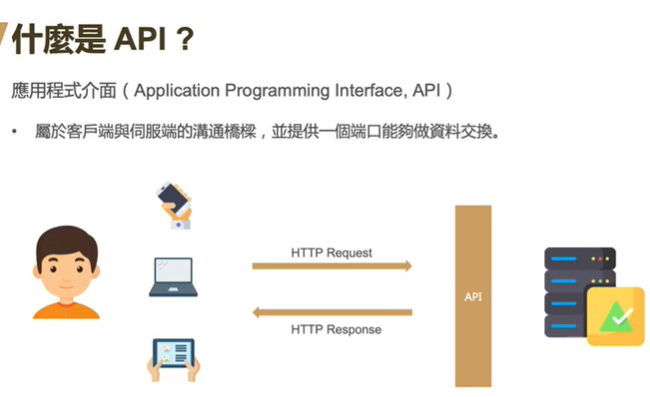
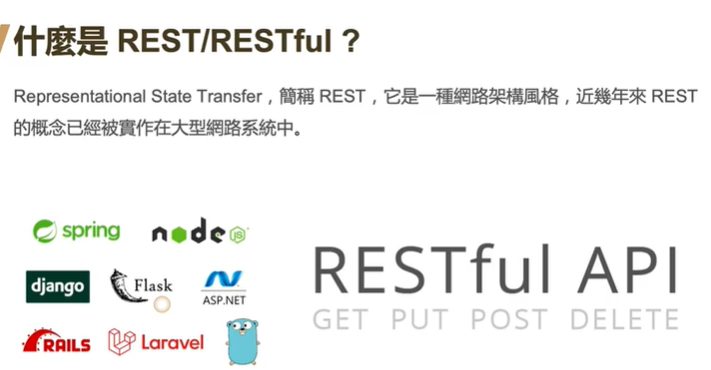
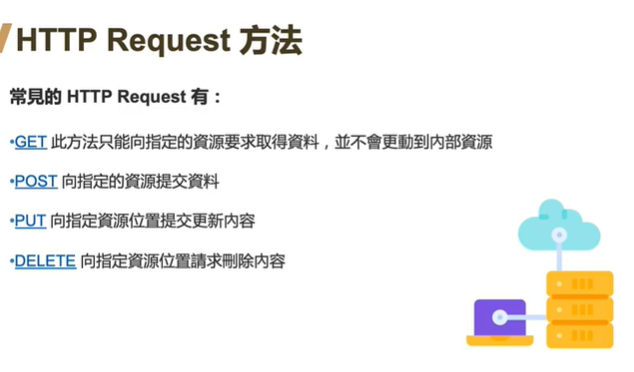
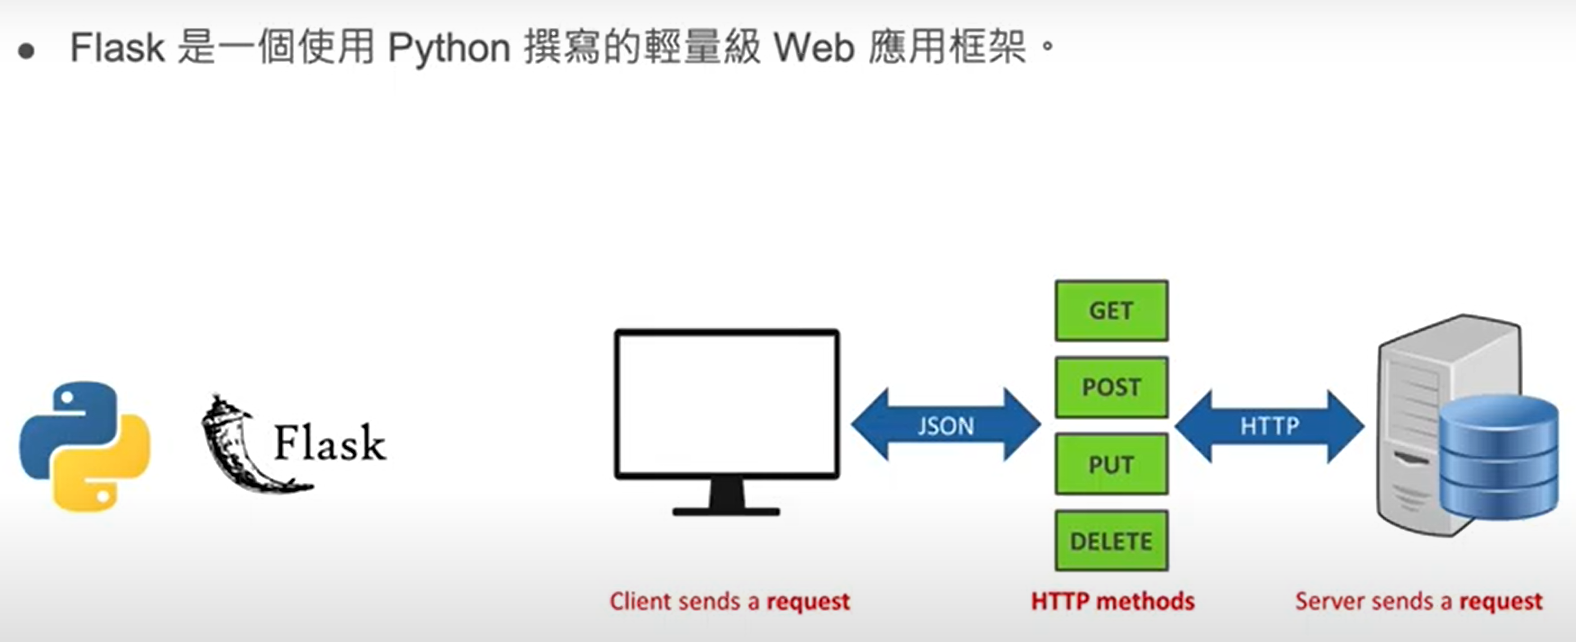

### 實作花朵分類器API 
1. Create run.py
2. Create model.py
3. 建立一個: model的目錄，內放:xgboost-iris.pgz (model 存檔)
4. pip install -r requirements.txt
5. python run.py
6. use Postman 與API 互動

In [ ]:
# run.py
mport numpy as np
import model

from flask import Flask, request, jsonify
from flask_cors import CORS
from xgboost import XGBClassifier

app = Flask(__name__)
CORS(app)

@app.route('/')
def index():
    return 'hello!!'

@app.route('/predict', methods=['POST'])
def postInput():
    # 取得前端傳過來的數值
    insertValues = request.get_json()
    x1=insertValues['sepalLengthCm']
    x2=insertValues['sepalWidthCm']
    x3=insertValues['petalLengthCm']
    x4=insertValues['petalWidthCm']
    input = np.array([[x1, x2, x3, x4]])

    result = model.predict(input)
    return jsonify({'return': str(result)})


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=3000, debug=True)

In [ ]:
# model.py
import pickle
import gzip
from xgboost import XGBClassifier

# 載入Model
with gzip.open('./model/xgboost-iris.pgz', 'rb') as f:
    xgboostModel = pickle.load(f)

def predict(input):
    pred=xgboostModel.predict(input)[0]
    print(pred)
    return pred

### 24.使用GCP部署機器學習API
此範例使用鳶尾花朵資料集進行 XGBoost 分類器模型訓練。將模型儲存起來，並使用 Flask 建置 API 介面提供輸入值預測。
最後並部署到 Google Cloud Platform。<br>
1. 使用 GCP 免費雲端平台部署應用程式
2. 建立一個虛擬機器: 每個Google帳號都有免費一年300美金額度的試用，啟用後首先一開始點選 Compute Enging 並新增建立 VM 執行個體。
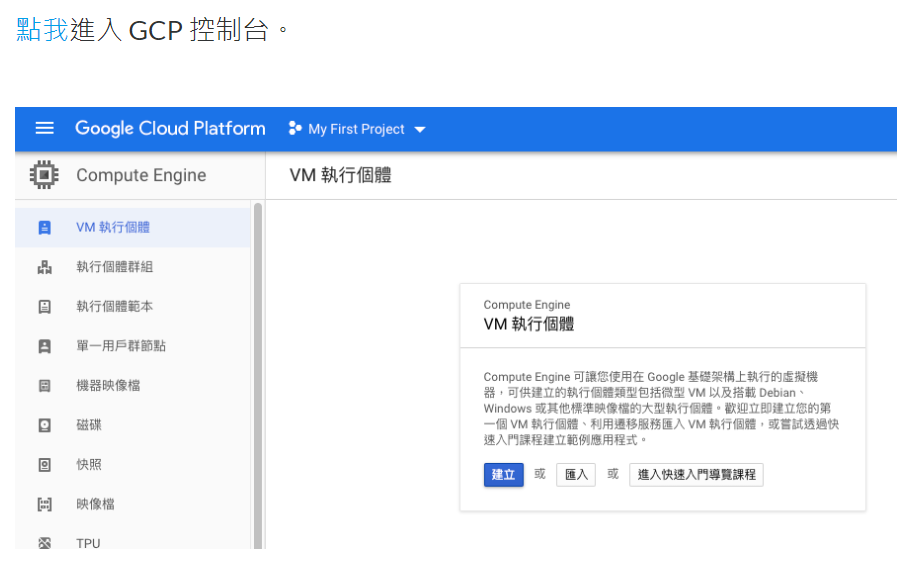
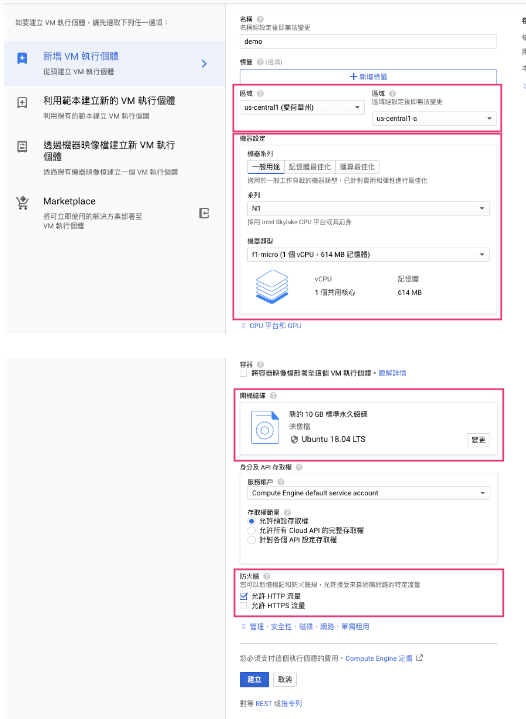
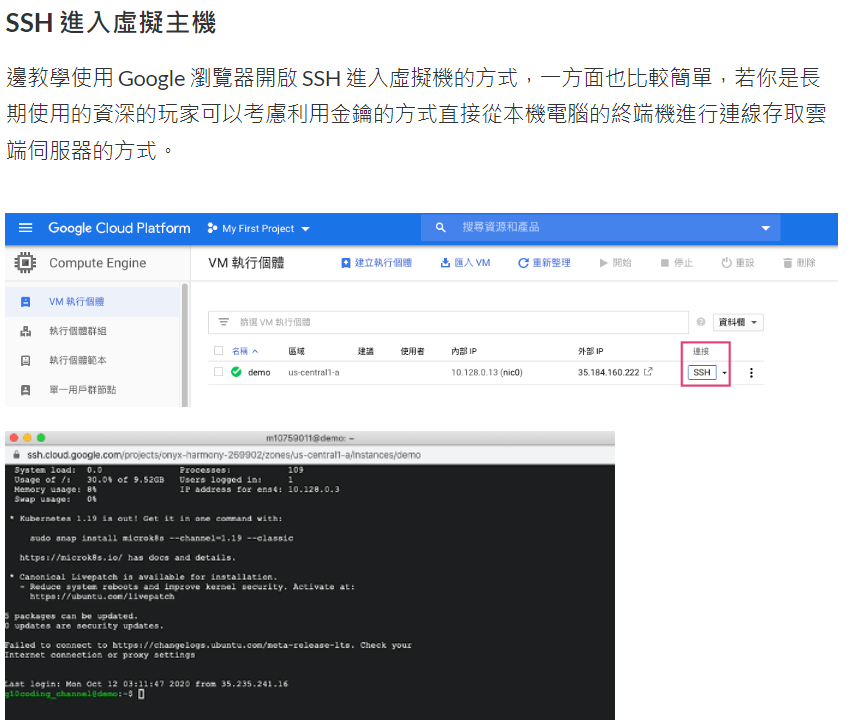
3. 安裝 Python in Linux 環境: 
<br>sudo apt update
<br>sudo apt install python3 python3-dev python3-venv build-essential
4. 輸入以下指令安裝 Python 以及 PIP 管理工具。
<br>wget https://bootstrap.pypa.io/get-pip.py
<br>sudo python3 get-pip.py
5. 執行 API
<br>git clone https://github.com/1010code/Flask-API-example-with-ML-model-GCP.git
<br>cd Flask-API-example-with-ML-model-GCP
6. 安裝必要套件
<br> pip3 install -r requirements.txt
7. 執行
<br> sudo python3 run.py